In [97]:
import pandas as pd
import numpy as np
import ExMAS
import ExMAS.main
import ExMAS.utils
import pprint
import csv
import os
import osmnx as ox
import dotmap
import sys
import random
import time
import math
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [16, 16]

import networkx as nx #graphs
cwd = os.getcwd()

from ExMAS.utils import inData as inData
from dotmap import DotMap


In [6]:
# df1 = pd.read_csv('City_requests.csv') #demografia Wzgórza Krzesławickie
# df = df1.loc[df1.index.repeat(df1.ogolem)].reset_index(drop=True) #repeat Rows N times (equal "ogolem"): N Rows = N people 

# params = ExMAS.utils.get_config('default_SUM.json') # load the default
# params.city = 'Krakow, Poland'
# params = ExMAS.utils.make_paths(params) # update file paths

# inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph
# frac = 0.2
# params.shared_discount = 0.3
# params.nP = int(frac * len(df))
# params.simTime = 0.5
# params.t0 = params.t0.replace(hour=8)
# params.speeds.ride = 6
# params.VoT = 0.003
# params.price = 1.5
# sample = df.sample(n = int(frac * len(df)), replace=False, weights=None, random_state=None, axis=None) # demand of RP=frac*population
# sample['origin'] = sample.apply(lambda row:  ox.get_nearest_node(inData.G, (row['y'], row['x'])), axis = 1) 

# inData = ExMAS.utils.generate_demand(inData, params) #generate trip requests

# my_requests = inData.requests
# my_requests.destination = ox.get_nearest_node(inData.G,[50.09516, 20.06522])
# my_requests["origin"] = sample.origin.values

# my_requests['dist'] = my_requests.apply(lambda request: inData.skim.loc[request.origin, request.destination], axis=1)

# my_requests['ttrav'] = my_requests.apply(lambda request: pd.Timedelta(request.dist, 's').floor('s'), axis=1)
# #my_requests.ttrav = (pd.to_timedelta(my_requests.ttrav) / params.speeds.ride).dt.floor('1s')
# my_requests.tarr = [request.treq + request.ttrav for _, request in my_requests.iterrows()]
# my_requests = inData.requests
# inData.requests = my_requests
# # inData.requests.to_csv("check.csv")

# inData = ExMAS.main(inData, params)

# KPIs = inData.sblts.res.to_frame()[:23]
# KPIs['description']  = ExMAS.utils.KPIs_descriptions
# KPIs.columns = ['KPI', 'description']
# KPIs
# # KPIs.to_csv("KPIs022.csv")

In [2]:
df1 = pd.read_csv('City_requests.csv') #demografia Wzgórza Krzesławickie
df = df1.loc[df1.index.repeat(df1.ogolem)].reset_index(drop=True) #repeat Rows N times (equal "ogolem"): N Rows = N people 
params = ExMAS.utils.get_config('default_SUM.json') # load the default
params.city = 'Krakow, Poland'
params = ExMAS.utils.make_paths(params) # update file paths
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [110]:
def run_ExMAS_SUM(inData, params, hub, frac, repl):

    params.nP = int(frac * len(df))
    sample = df.sample(n = int(frac * len(df)), replace=False, weights=None, random_state=None, axis=None) # demand of RP=frac*population
    sample['origin'] = sample.apply(lambda row:  ox.get_nearest_node(inData.G, (row['y'], row['x'])), axis = 1) 
    inData = ExMAS.utils.generate_demand(inData, params) #generate trip requests

    my_requests = inData.requests
    my_requests.destination = hub[1]
    my_requests["origin"] = sample.origin.values
    my_requests['dist'] = my_requests.apply(lambda request: inData.skim.loc[request.origin, request.destination], axis=1)
    my_requests['ttrav'] = my_requests.apply(lambda request: pd.Timedelta(request.dist, 's').floor('s'), axis=1)
    my_requests.tarr = [request.treq + request.ttrav for _, request in my_requests.iterrows()]
    my_requests = inData.requests
    inData.requests = my_requests
    # inData.requests.to_csv("check.csv")
    inData = ExMAS.main(inData, params)
    KPIs = inData.sblts.res.to_frame()[:23]
    # KPIs['description']  = ExMAS.utils.KPIs_descriptions
    KPIs.columns = ['KPI']
    KPIs
    KPIs.to_csv(f'KPI_{hub[0]}_{frac}_{repl}.csv') #res/
    return KPIs



params.shared_discount = 0.2
params.simTime = 0.5
params.t0 = params.t0.replace(hour=8)
params.speeds.ride = 6
params.VoT = 0.003
params.price = 1.5
results = dict()
 
hubs = [('hub1', ox.get_nearest_node(inData.G,[50.09516, 20.06522])),   #list of hubs
        ('hub2', ox.get_nearest_node(inData.G,[50.09203901, 20.07409523]))]

for frac in  [0.001, 0.003]: #list of frac 0.003, 0.005, 0.007, 0.009, 0.01
    for h in hubs:
        for i in range(6): 
            print(h[0], frac, i + 1)
            results[frac] = run_ExMAS_SUM(inData, params, h, frac, i)

hub1 0.001 1
17-01-24 14:10:58-INFO-Initializing pairwise trip shareability between 2 and 2 trips.
17-01-24 14:10:58-INFO-creating combinations
17-01-24 14:10:58-INFO-2	 nR*(nR-1)
17-01-24 14:10:58-INFO-Degree 2 	Completed
17-01-24 14:10:58-INFO-No more trips to exted at degree 2
17-01-24 14:10:58-INFO-Matching 2 trips to 2 rides in order to minimize u_veh
17-01-24 14:10:58-INFO-Problem solution: Optimal. 
Total costs for single trips:            387 
reduced by matching to:                  387
17-01-24 14:10:58-INFO-Calculations  completed
17-01-24 14:10:58-INFO-DotMap(VehHourTrav=387, VehHourTrav_ns=387, PassHourTrav=387, PassHourTrav_ns=387, PassUtility=4.6485, PassUtility_ns=4.6485, mean_lambda=nan, revenue_s=464.40000000000003, revenue_ns=580.5, Fare_Discount=-0.19999999999999993, nR=2, SINGLE=2, PAIRS=0, TRIPLES=0, QUADRIPLES=0, QUINTETS=0, PLUS5=0, shared_ratio=0.0, fleet_size_nonshared=1.0, fleet_size_shared=1.0, lambda_shared=0)
hub1 0.001 2
17-01-24 14:10:58-INFO-Initializin

In [117]:
import itertools 

for h, frac, i in list(itertools.product([1, 2], [0.001, 0.003], [0, 1, 2, 3, 4])):   # three lists of hubs, fractions and replication id
    results[str((h, frac, i))] = pd.read_csv('KPI_hub' + str(h) + "_" + str(frac) + "_" + str(i) + ".csv", index_col=0)["KPI"]
pd.DataFrame(results)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

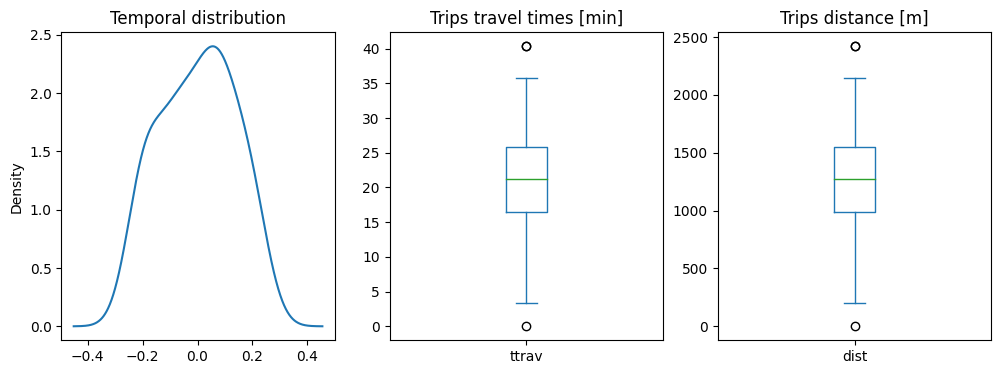

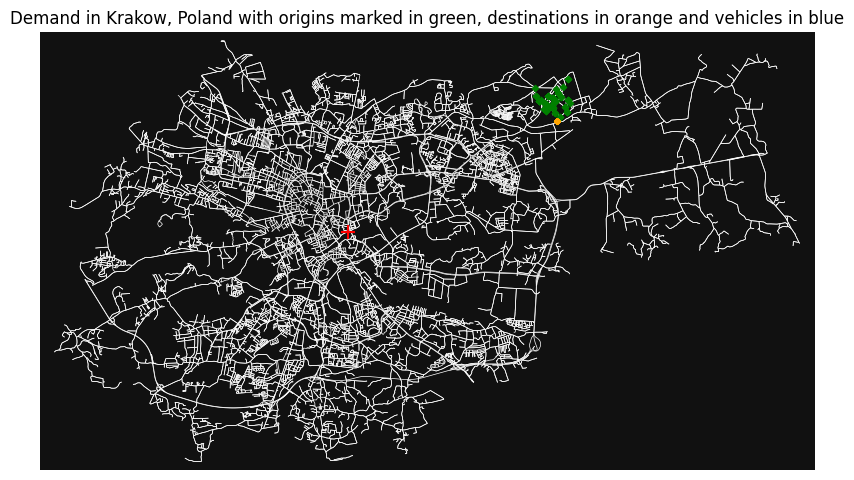

In [5]:
ExMAS.utils.plot_demand(inData, params)

# plotting #

In [4]:
df2 = pd.read_csv('KPI_results.csv', index_col=0) # discount 0.3, hub1, rep = 1

df2['del_VehHourTrav']=abs(df2['VehHourTrav']-df2['VehHourTrav_ns'])/df2['VehHourTrav_ns']           # KPI1: vehicle hours reduction
df2['del_PassUtility']=abs((df2['PassUtility']-df2['PassUtility_ns'])/df2['PassUtility_ns'])      # KPI2: travellers utility gains
df2['Occupancy']=df2['PassHourTrav']/df2['VehHourTrav']                                       # KPI4: occupancy
df2['del_PassHourTrav']=abs((df2['PassHourTrav']-df2['PassHourTrav_ns'])/df2['PassHourTrav_ns'])  # KPI5: passenger hours increase
df2['del_fleet_size']=abs((df2['fleet_size_shared']-df2['fleet_size_nonshared'])/df2['fleet_size_nonshared'])  # KPI6: potential fleet size reduction                  
                  
df2['frac'] = round((df2['nR'] / len(df)),2)

In [5]:
df3 = pd.read_csv('KPI_results2.csv', index_col=0) # discount 0.2, hub1, rep = 1

df3['del_VehHourTrav']=abs(df3['VehHourTrav']-df3['VehHourTrav_ns'])/df3['VehHourTrav_ns']           # KPI1: vehicle hours reduction
df3['del_PassUtility']=abs((df3['PassUtility']-df3['PassUtility_ns'])/df3['PassUtility_ns'])      # KPI2: travellers utility gains
df3['Occupancy']=df2['PassHourTrav']/df2['VehHourTrav']                                       # KPI4: occupancy
df3['del_PassHourTrav']=abs((df3['PassHourTrav']-df3['PassHourTrav_ns'])/df3['PassHourTrav_ns'])  # KPI5: passenger hours increase
df3['del_fleet_size']=abs((df3['fleet_size_shared']-df3['fleet_size_nonshared'])/df3['fleet_size_nonshared'])  # KPI6: potential fleet size reduction                  
                  
df3['frac'] = round((df3['nR'] / len(df)),2)

In [6]:
df4 = pd.read_csv('KPI_results1.csv', index_col=0) # discount 0.1, hub1, rep = 1

df4['del_VehHourTrav']=abs(df4['VehHourTrav']-df4['VehHourTrav_ns'])/df4['VehHourTrav_ns']           # KPI1: vehicle hours reduction
df4['del_PassUtility']=abs((df4['PassUtility']-df4['PassUtility_ns'])/df4['PassUtility_ns'])      # KPI2: travellers utility gains
df4['Occupancy']=df2['PassHourTrav']/df2['VehHourTrav']                                       # KPI4: occupancy
df4['del_PassHourTrav']=abs((df4['PassHourTrav']-df4['PassHourTrav_ns'])/df4['PassHourTrav_ns'])  # KPI5: passenger hours increase
df4['del_fleet_size']=abs((df4['fleet_size_shared']-df4['fleet_size_nonshared'])/df4['fleet_size_nonshared'])  # KPI6: potential fleet size reduction                  
                  
df4['frac'] = round((df4['nR'] / len(df)),2)

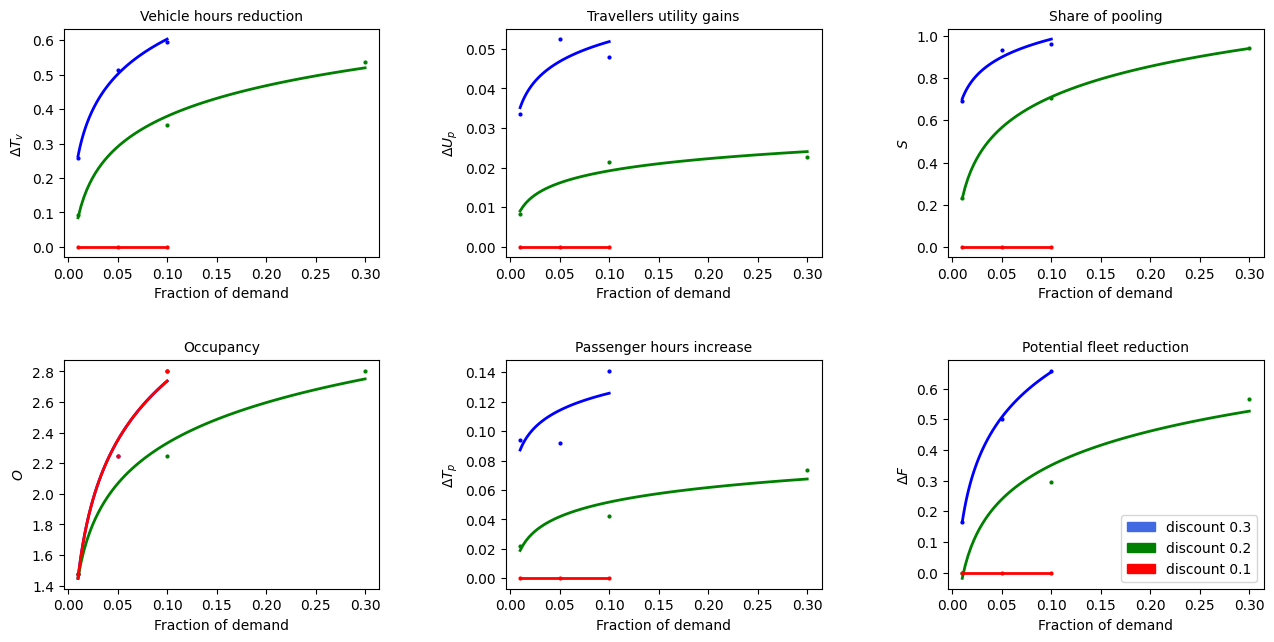

In [7]:
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.patches as mpatches
from cycler import cycler


def plot_log_fit(x,y,ax, color = 'black'):
    popt, pcov = curve_fit(lambda t, a, b, c: a * np.log(b * t) + c, x,y )
    a = popt[0]
    b = popt[1]
    c = popt[2]
    x_fitted = np.linspace(np.min(x), np.max(x), 100)
    y_fitted = a * np.log(b * x_fitted) + c
    ax.plot(x_fitted, y_fitted, lw = 2, color = color)

fig, axes = plt.subplots(2,3, figsize = (12,8))
axes = axes.flatten()

ax=axes[0]
to_plot = df2
plot_log_fit(to_plot.frac, to_plot.del_VehHourTrav, ax, 'blue')
to_plot = df2.groupby(df2.frac).del_VehHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')
to_plot = df3
plot_log_fit(to_plot.frac, to_plot.del_VehHourTrav, ax, 'green')
to_plot = df3.groupby(df3.frac).del_VehHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')
to_plot = df4
plot_log_fit(to_plot.frac, to_plot.del_VehHourTrav, ax, 'red')
to_plot = df4.groupby(df4.frac).del_VehHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='red', marker = 'o')

ax.set_ylabel("$\Delta T_v$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Vehicle hours reduction", fontsize=10, fontweight='normal')

ax=axes[1]
to_plot = df2
plot_log_fit(to_plot.frac, to_plot.del_PassUtility, ax, 'blue')
to_plot = df2.groupby(df2.frac).del_PassUtility.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')
to_plot = df3
plot_log_fit(to_plot.frac, to_plot.del_PassUtility, ax, 'green')
to_plot = df3.groupby(df3.frac).del_PassUtility.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')
to_plot = df4
plot_log_fit(to_plot.frac, to_plot.del_PassUtility, ax, 'red')
to_plot = df4.groupby(df4.frac).del_PassUtility.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='red', marker = 'o')

ax.set_ylabel("$\Delta U_p$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Travellers utility gains", fontsize=10, fontweight='normal')

ax=axes[2]
to_plot = df2
plot_log_fit(to_plot.frac, to_plot.shared_ratio, ax, 'blue')
to_plot = df2.groupby(df2.frac).shared_ratio.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')
to_plot = df3
plot_log_fit(to_plot.frac, to_plot.shared_ratio, ax, 'green')
to_plot = df3.groupby(df3.frac).shared_ratio.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')
to_plot = df4
plot_log_fit(to_plot.frac, to_plot.shared_ratio, ax, 'red')
to_plot = df4.groupby(df4.frac).shared_ratio.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='red', marker = 'o')

ax.set_ylabel("$S$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Share of pooling", fontsize=10, fontweight='normal')

ax=axes[3]
to_plot = df2
plot_log_fit(to_plot.frac, to_plot.Occupancy, ax, 'blue')
to_plot = df2.groupby(df2.frac).Occupancy.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')
to_plot = df3
plot_log_fit(to_plot.frac, to_plot.Occupancy, ax, 'green')
to_plot = df3.groupby(df3.frac).Occupancy.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')
to_plot = df4
plot_log_fit(to_plot.frac, to_plot.Occupancy, ax, 'red')
to_plot = df4.groupby(df4.frac).Occupancy.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='red', marker = 'o')

ax.set_ylabel("$O$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Occupancy", fontsize=10, fontweight='normal')

ax=axes[4]
to_plot = df2
plot_log_fit(to_plot.frac, to_plot.del_PassHourTrav, ax, 'blue')
to_plot = df2.groupby(df2.frac).del_PassHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')
to_plot = df3
plot_log_fit(to_plot.frac, to_plot.del_PassHourTrav, ax, 'green')
to_plot = df3.groupby(df3.frac).del_PassHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')
to_plot = df4
plot_log_fit(to_plot.frac, to_plot.del_PassHourTrav, ax, 'red')
to_plot = df4.groupby(df4.frac).del_PassHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='red', marker = 'o')

ax.set_ylabel("$\Delta T_p$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Passenger hours increase", fontsize=10, fontweight='normal')

ax=axes[5]
to_plot = df2
plot_log_fit(to_plot.frac, to_plot.del_fleet_size, ax, 'blue')
to_plot = df2.groupby(df2.frac).del_fleet_size.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')
to_plot = df3
plot_log_fit(to_plot.frac, to_plot.del_fleet_size, ax, 'green')
to_plot = df3.groupby(df3.frac).del_fleet_size.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')
to_plot = df4
plot_log_fit(to_plot.frac, to_plot.del_fleet_size, ax, 'red')
to_plot = df4.groupby(df4.frac).del_fleet_size.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='red', marker = 'o')
           
ax.set_ylabel("$\Delta F$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Potential fleet reduction", fontsize=10, fontweight='normal')


plt.subplots_adjust(left=0,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.45)
legend_dict = { 'discount 0.3': 'royalblue', 'discount 0.2' : 'green', 'discount 0.1' : 'red' }
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList, loc='lower right')
plt.savefig('legend.png', bbox_inches='tight')

# plt.savefig('F1.jpg', dpi=100)


In [17]:
path = r'res'
fileNames = os.listdir(path)


In [74]:
# path = r'res' 
# fileNames = os.listdir(path)

# with open ('res\ALL_DATA.csv', 'a') as output:    
#     writer = csv.writer(output)
#     for f in fileNames:
#         with open(os.path.join(path, f), "r") as file:
#             csvreader = csv.reader(file)
#             for row in csvreader:
#                 print(row)
#                 writer.writerow(row)

In [54]:

# from itertools import izip

# a = izip(*csv.reader(open('res/KPI_hub2_0.001_0.csv', "rb")))
# csv.writer(open("res/KPI_hub2_0.02_4(1).csv", "wb")).writerows(a)

In [80]:
# l =  pd.read_csv('res/KPI_hub2_0.001_0.csv')

# out = open('out.csv', 'w')
# for row in l:
#     for column in row:
#         out.write('%s' % column)
#     out.write('\n')
# out.close()